In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation

In [4]:
data=pd.read_csv('hr_dataset.csv')
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.tail()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

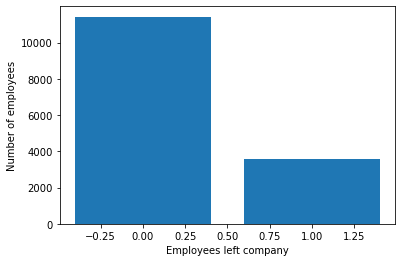

In [9]:
left_count=data.groupby('churn').count()
plt.bar(left_count.index.values, left_count['satisfaction'])
plt.xlabel('Employees left company')
plt.ylabel('Number of employees')
plt.show()

In [10]:
data.churn.value_counts()

0    11428
1     3571
Name: churn, dtype: int64

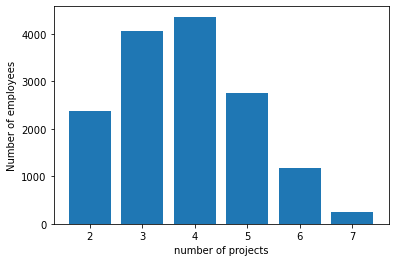

In [11]:
num_projects=data.groupby('number_of_projects').count()
plt.bar(num_projects.index.values, num_projects['satisfaction'])
plt.xlabel('number of projects')
plt.ylabel('Number of employees')
plt.show()

In [12]:
data.number_of_projects.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_of_projects, dtype: int64

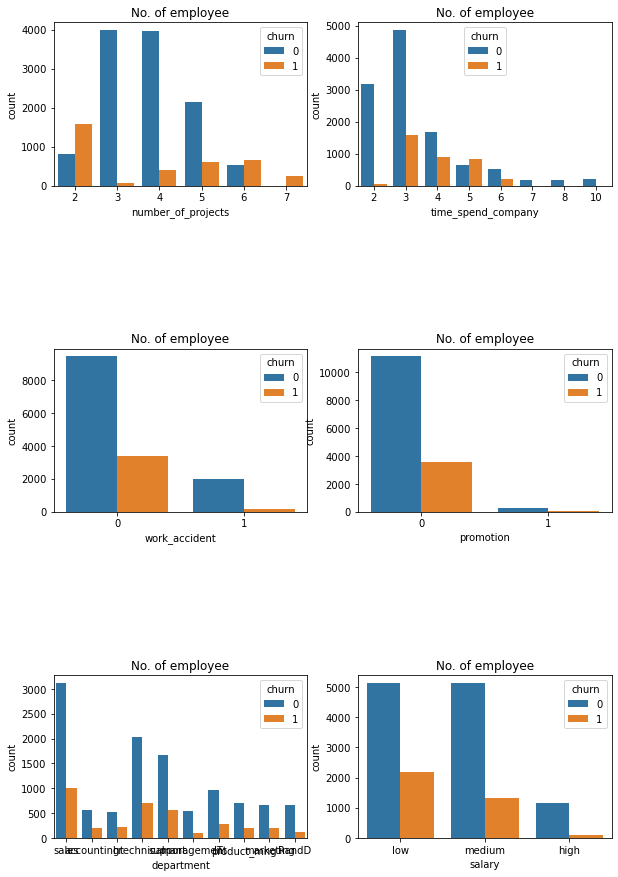

In [13]:
fig=plt.subplots(figsize=(10,15))
features=['number_of_projects','time_spend_company','work_accident','promotion','department','salary']
for  i,j in enumerate(features):
    plt.subplot(3,2,i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j,data=data,hue='churn')
    plt.title('No. of employee')

In [14]:
data=pd.get_dummies(data)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            14999 non-null  float64
 1   evaluation              14999 non-null  float64
 2   number_of_projects      14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   work_accident           14999 non-null  int64  
 6   churn                   14999 non-null  int64  
 7   promotion               14999 non-null  int64  
 8   department_IT           14999 non-null  uint8  
 9   department_RandD        14999 non-null  uint8  
 10  department_accounting   14999 non-null  uint8  
 11  department_hr           14999 non-null  uint8  
 12  department_management   14999 non-null  uint8  
 13  department_marketing    14999 non-null  uint8  
 14  department_product_mng  14999 non-null

In [16]:
x=data.drop(['churn'],axis=1)
y=data['churn']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=23)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11249, 20)
(11249,)
(3750, 20)
(3750,)


In [18]:
y_test

14439    1
13733    0
13253    0
4135     0
599      1
        ..
1150     1
951      1
7641     0
13672    0
14614    1
Name: churn, Length: 3750, dtype: int64

# Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logit=LogisticRegression()
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7861333333333334


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
logit=LogisticRegression(class_weight={0:0.73,1:1})
logit.fit(x_train,y_train)
y_pred=logit.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8053333333333333


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [24]:
print('Accuracy = ',accuracy_score(y_test, y_pred))
print('Precision = ',precision_score(y_test, y_pred))
print('Recall = ',recall_score(y_test, y_pred))
print('f1_score = ',f1_score(y_test, y_pred))

Accuracy =  0.8053333333333333
Precision =  0.6549865229110512
Recall =  0.50625
f1_score =  0.5710928319623971


# Decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [26]:
print('Accuracy = ',accuracy_score(y_test, y_pred))
print('Precision = ',precision_score(y_test, y_pred))
print('Recall = ',recall_score(y_test, y_pred))
print('f1_score = ',f1_score(y_test, y_pred))
print('confusion matrix=')



Accuracy =  0.9784
Precision =  0.9480122324159022
Recall =  0.96875
f1_score =  0.9582689335394127
confusion matrix=


# Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rft=RandomForestClassifier()
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)

from sklearn.metrics import confusion_matrix 

In [28]:
print('Accuracy = ',accuracy_score(y_test, y_pred))
print('Precision = ',precision_score(y_test, y_pred))
print('Recall = ',recall_score(y_test, y_pred))
print('f1_score = ',f1_score(y_test, y_pred))
print('confusion matrix=')
confusion_matrix(y_test,y_pred)


Accuracy =  0.9914666666666667
Precision =  0.9946695095948828
Recall =  0.971875
f1_score =  0.9831401475237092
confusion matrix=


array([[2785,    5],
       [  27,  933]], dtype=int64)

# KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(1,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    metric_k.append(acc)

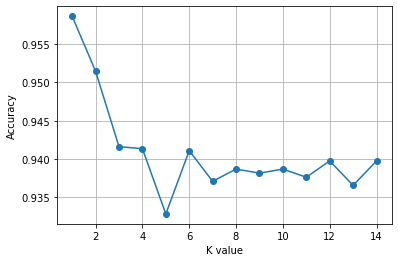

In [30]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

In [31]:
classifier=KNeighborsClassifier(n_neighbors=1, metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [32]:
print('Accuracy = ',accuracy_score(y_test, y_pred))
print('Precision = ',precision_score(y_test, y_pred))
print('Recall = ',recall_score(y_test, y_pred))
print('f1_score = ',f1_score(y_test, y_pred))
print('confusion matrix=')
confusion_matrix(y_test,y_pred)

Accuracy =  0.9586666666666667
Precision =  0.8949950932286556
Recall =  0.95
f1_score =  0.921677614957049
confusion matrix=


array([[2683,  107],
       [  48,  912]], dtype=int64)


# Support vector machine

In [33]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [34]:
print('Accuracy = ',accuracy_score(y_test, y_pred))
print('Precision = ',precision_score(y_test, y_pred))
print('Recall = ',recall_score(y_test, y_pred))
print('f1_score = ',f1_score(y_test, y_pred))
print('confusion matrix=')
confusion_matrix(y_test,y_pred)

Accuracy =  0.7589333333333333
Precision =  1.0
Recall =  0.058333333333333334
f1_score =  0.11023622047244094
confusion matrix=


array([[2790,    0],
       [ 904,   56]], dtype=int64)